In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import time, timedelta
import dash
from dash import dcc, html

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv("US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [5]:
df.drop(['End_Lat','End_Lng',"Country"],axis=1,inplace=True)

In [6]:
df_temp = df.dropna(subset=['Description',"City","Street","Zipcode","Timezone"])
df_temp.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Timezone                       0
Airport_Code               14789
Weather_Timestamp         112189
Temperature(F)            155735
Wind_Chill(F)            1990747
Humidity(%)               166018
Pressure(in)              132605
Visibility(mi)            168946
Wind_Direction            167049
Wind_Speed(mph)           563061
Precipitation(in)        2195167
Weather_Condition         165345
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction  

In [7]:
cols_to_fill = [
    "Wind_Chill(F)", "Humidity(%)", "Pressure(in)",
    "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)","Temperature(F)"]

df_temp[cols_to_fill] = (
    df_temp.groupby(['State',"Timezone"])[cols_to_fill]
           .transform(lambda g: g.fillna(g.mean()))
)

df_temp.isna().sum()

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\2356332914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[cols_to_fill] = (


ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                        0
City                          0
County                        0
State                         0
Zipcode                       0
Timezone                      0
Airport_Code              14789
Weather_Timestamp        112189
Temperature(F)                0
Wind_Chill(F)                 0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction           167049
Wind_Speed(mph)               0
Precipitation(in)             0
Weather_Condition        165345
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit 

In [9]:
df_temp["Start_Time"] = pd.to_datetime(df_temp["Start_Time"], format="mixed")
df_temp["Weather_Timestamp"] = pd.to_datetime(df_temp["Weather_Timestamp"], format="mixed")
df_temp["End_Time"] = pd.to_datetime(df_temp["End_Time"], format="mixed")

time_diff = df_temp["Weather_Timestamp"] - df_temp["Start_Time"]
time_diff.mean()

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\521694801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Start_Time"] = pd.to_datetime(df_temp["Start_Time"], format="mixed")
C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\521694801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Weather_Timestamp"] = pd.to_datetime(df_temp["Weather_Timestamp"], format="mixed")
C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\521694801.py:3: FutureWarning: Parsed string "2019-04-05 07I23:47" i

DateParseError: Unknown datetime string format, unable to parse: 2019-04-05 07�27:28, at position 2138559

In [10]:
df_temp.drop(["Weather_Timestamp"], axis=1, inplace=True)

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\36945736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(["Weather_Timestamp"], axis=1, inplace=True)


In [11]:
cols_to_fill = [
    "Wind_Direction", "Weather_Condition", "Airport_Code"
]

df_temp[cols_to_fill] = (
    df_temp.groupby(['State', 'Timezone'])[cols_to_fill]
           .transform(lambda g: g.fillna(g.mode().iloc[0] if not g.mode().empty else None))
)

df_temp.isna().sum()

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\1561003667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[cols_to_fill] = (


ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  0
Street                       0
City                         0
County                       0
State                        0
Zipcode                      0
Timezone                     0
Airport_Code                 0
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction               0
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabo

In [12]:
day = ["Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"]

df_temp[day] = (
    df_temp.groupby("City")[day]
           .transform(lambda g: g.fillna(
               g.mode().iloc[0] if not g.mode().empty else np.nan
           ))
)

df_temp.isna().sum()

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\1466619299.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda g: g.fillna(
C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\1466619299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[day] = (


ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  0
Street                       0
City                         0
County                       0
State                        0
Zipcode                      0
Timezone                     0
Airport_Code                 0
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction               0
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabo

In [13]:
twilight_cols = ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',"Sunrise_Sunset"]
for col in twilight_cols:
    df_temp[col] = df_temp[col].fillna(df_temp[col].mode()[0])

df_temp.shape

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\443591779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[col] = df_temp[col].fillna(df_temp[col].mode()[0])


(7709465, 42)

In [14]:
df_temp.sort_values(by='End_Time', inplace = True)

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\2443765961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.sort_values(by='End_Time', inplace = True)


In [15]:
df_temp.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3648484,A-3662221,Source1,2,2023-03-31 21:53:00,2023-03-31 23:58:00.000000000,33.978486,-118.078208,0.987,Stationary traffic on San Gabriel River Fwy S ...,I-605 S,...,False,False,False,False,False,False,Night,Night,Night,Night
3671703,A-3696375,Source1,2,2023-03-31 22:57:47,2023-03-31 23:58:20,44.898807,-93.401356,0.219,Accident on US-169 N from US-212/MN-62 (US-169...,Londonderry Rd,...,False,False,False,False,False,False,Night,Night,Night,Night
4296525,A-4328971,Source1,2,2022-12-01 10:51:51,2023-03-31 23:59:00,41.877980,-87.647240,0.045,Closed between S Halsted St and I-90/I-94/Kenn...,S Halsted St,...,False,True,False,False,True,False,Day,Day,Day,Day
3788155,A-3816534,Source1,4,2022-12-01 10:51:51,2023-03-31 23:59:00,41.877980,-87.647240,0.045,Closed between S Halsted St and I-90/I-94/Kenn...,S Halsted St,...,False,True,False,False,True,False,Day,Day,Day,Day
3674549,A-3700556,Source1,2,2023-03-31 21:28:00,2023-03-31 23:59:00,40.781250,-87.129575,8.095,Slow traffic on I-65 S from US-231/Exit 205 (I...,I-65,...,False,False,False,False,False,False,Night,Night,Night,Night


In [16]:
df_slice = df_temp[-100000:]
df_slice.info()
pd.options.mode.copy_on_write = True 

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4883082 to 3674549
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     100000 non-null  object        
 1   Source                 100000 non-null  object        
 2   Severity               100000 non-null  int64         
 3   Start_Time             100000 non-null  datetime64[ns]
 4   End_Time               100000 non-null  object        
 5   Start_Lat              100000 non-null  float64       
 6   Start_Lng              100000 non-null  float64       
 7   Distance(mi)           100000 non-null  float64       
 8   Description            100000 non-null  object        
 9   Street                 100000 non-null  object        
 10  City                   100000 non-null  object        
 11  County                 100000 non-null  object        
 12  State                  100000 non-null  ob

In [17]:
df_slice.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

In [18]:
df_slice.describe()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.066400,2023-02-22 00:19:24.816039936,37.209593,-102.071499,1.079792,47.623012,44.872834,65.143834,29.164210,8.568157,8.046082,0.006605
min,2.000000,2020-02-21 06:37:42,24.594863,-124.482795,0.000000,-40.000000,-40.000000,4.000000,19.460000,0.000000,0.000000,0.000000
25%,2.000000,2023-02-06 08:23:00,33.942298,-118.471158,0.086000,37.000000,33.000000,48.000000,29.020000,9.000000,3.000000,0.000000
50%,2.000000,2023-02-16 18:46:44,37.340011,-111.679134,0.383000,49.000000,48.000000,68.000000,29.600000,10.000000,7.000000,0.000000
75%,2.000000,2023-03-21 10:30:41.249999872,40.566679,-83.048051,1.020000,58.000000,58.000000,86.000000,29.940000,10.000000,12.000000,0.000000
max,4.000000,2023-03-31 23:30:00,48.993209,-71.031639,59.368000,207.000000,207.000000,100.000000,30.680000,70.000000,100.000000,1.340000
std,0.358319,NaN,4.300949,18.528360,2.493453,15.503375,18.625338,23.327303,1.411472,2.932168,6.047310,0.028587


In [19]:
df_slice.describe(include=['object'])

,ID,Source,End_Time,Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,1,77438,63934,20886,4854,1053,45,22921,4,1280,18,77,2,2,2,2
top,A-4920112,Source1,2023-02-13 00:01:09,Accident,I-5 N,Los Angeles,Los Angeles,CA,92407,US/Pacific,KCQT,CALM,Fair,Day,Day,Day,Day
freq,1,100000,24,1976,1553,3467,11685,41535,285,46671,2743,19270,43539,64423,69629,75052,79343


In [20]:
df_slice.describe(include=['bool'])

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,2,2,2,2,2,2,2,2,2,2,2,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,99322,99952,94967,99747,91425,99865,99269,99999,98609,98143,99936,93259,100000


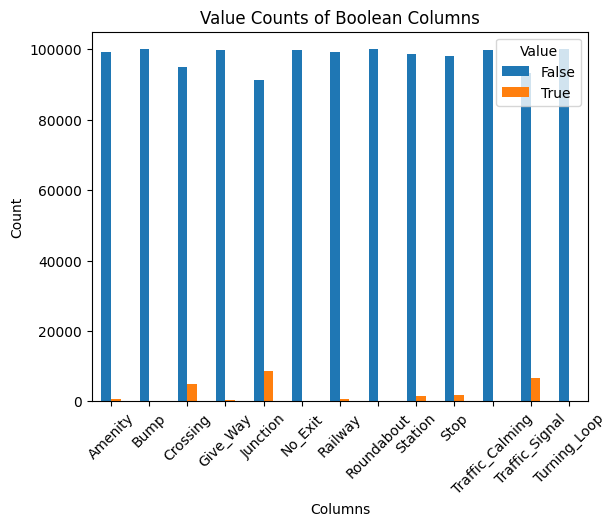

In [21]:
bool_cols = df_slice.select_dtypes(include=bool)

val_counts = bool_cols.apply(lambda x: x.value_counts())

val_counts.T.plot(kind='bar', stacked=False)
plt.title("Value Counts of Boolean Columns")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Value")
plt.show()

In [22]:
df_slice.drop(["Source","Description"], axis=1, inplace=True)

In [23]:
df_slice['twilight_conclusion'] = df_slice.loc[:, twilight_cols].apply(
    lambda row: row.value_counts().idxmax(),
    axis=1
)

df_slice['twilight_conclusion'] = df_slice['twilight_conclusion'].map({'Day': 1, 'Night': 0})

In [24]:
df_slice.drop(twilight_cols, axis=1, inplace=True)

In [25]:
df_slice.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,twilight_conclusion
4883082,A-4920112,4,2023-01-29 18:29:00,2023-01-29 19:50:40,25.866967,-80.323114,0.193,Palmetto Expy S,Hialeah,Miami-Dade,...,False,False,False,False,False,False,False,True,False,0
3937576,A-3967113,2,2023-01-29 18:42:30,2023-01-29 19:51:00,39.605642,-77.744638,1.214,I-70 E,Hagerstown,Washington,...,False,False,False,False,False,False,False,False,False,0
5132867,A-5171794,2,2023-01-29 18:39:00,2023-01-29 19:51:00,33.197660,-117.368233,1.068,I-5 N,Oceanside,San Diego,...,False,False,False,False,False,False,False,False,False,0
4304741,A-4337265,2,2023-01-29 18:35:00,2023-01-29 19:51:39,34.234010,-118.183633,1.750,Angeles Crest Hwy,La Canada Flintridge,Los Angeles,...,False,False,False,False,False,False,False,False,False,0
4392179,A-4425409,2,2023-01-29 18:36:00,2023-01-29 19:51:42.000000000,28.449901,-81.499854,0.011,Granada Blvd,Orlando,Orange,...,False,False,False,False,False,False,False,True,False,0


In [26]:
df_slice['twilight_conclusion'].nunique()

2

In [27]:
df_slice.drop(["Bump","No_Exit","Traffic_Calming","Turning_Loop"],axis=1,inplace=True)

In [28]:
df_slice = df_slice.reset_index(drop=True)
df_slice.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,...,Amenity,Crossing,Give_Way,Junction,Railway,Roundabout,Station,Stop,Traffic_Signal,twilight_conclusion
0,A-4920112,4,2023-01-29 18:29:00,2023-01-29 19:50:40,25.866967,-80.323114,0.193,Palmetto Expy S,Hialeah,Miami-Dade,...,False,True,False,False,False,False,False,False,True,0
1,A-3967113,2,2023-01-29 18:42:30,2023-01-29 19:51:00,39.605642,-77.744638,1.214,I-70 E,Hagerstown,Washington,...,False,False,False,False,False,False,False,False,False,0
2,A-5171794,2,2023-01-29 18:39:00,2023-01-29 19:51:00,33.197660,-117.368233,1.068,I-5 N,Oceanside,San Diego,...,False,False,False,False,False,False,False,False,False,0
3,A-4337265,2,2023-01-29 18:35:00,2023-01-29 19:51:39,34.234010,-118.183633,1.750,Angeles Crest Hwy,La Canada Flintridge,Los Angeles,...,False,False,False,False,False,False,False,False,False,0
4,A-4425409,2,2023-01-29 18:36:00,2023-01-29 19:51:42.000000000,28.449901,-81.499854,0.011,Granada Blvd,Orlando,Orange,...,False,True,False,False,False,False,False,False,True,0


In [29]:
df_slice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   100000 non-null  object        
 1   Severity             100000 non-null  int64         
 2   Start_Time           100000 non-null  datetime64[ns]
 3   End_Time             100000 non-null  object        
 4   Start_Lat            100000 non-null  float64       
 5   Start_Lng            100000 non-null  float64       
 6   Distance(mi)         100000 non-null  float64       
 7   Street               100000 non-null  object        
 8   City                 100000 non-null  object        
 9   County               100000 non-null  object        
 10  State                100000 non-null  object        
 11  Zipcode              100000 non-null  object        
 12  Timezone             100000 non-null  object        
 13  Airport_Code   

In [30]:
df_slice.drop("ID",axis=1,inplace=True)

In [31]:
fig = px.scatter(
    df_slice,
    x="Start_Lat",
    y="Start_Lng",
    labels={"Start_Lat": "Start Latitude", "Start_Lng": "Start Longitude"},
    height=800
)

fig.update_traces(marker=dict(size=4, opacity=0.6))
fig.update_layout(
    xaxis_title="Start_Lat",
    yaxis_title="Start_Lng"
)

fig.show()

In [32]:
fig = px.scatter_mapbox(
    df.sample(10000), 
    lat="Start_Lat", lon="Start_Lng",
    hover_name="City",
    hover_data=["State", "Weather_Condition"],
    color_discrete_sequence=["red"], zoom=3, height=500
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Map of Accident Locations (Sample of 10000)")
fig.show()


C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\3413819535.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [33]:
count_by_state = df_slice.groupby("State").size().reset_index(name='Count').sort_values(by='Count')
count_by_state.columns = ["State", "Count"]


fig = px.bar(
    count_by_state,
    x="State",
    y="Count",
    title="Count by State",
    labels={"Count": "Number of Records"},
    height=600,
    width=1000
)

fig.update_layout(
    xaxis=dict(tickangle=45),
    bargap=0.2
)

fig.show()

In [34]:
df_slice['Start_Year'] = df_slice['Start_Time'].dt.year
df_slice['Start_Month'] = df_slice['Start_Time'].dt.month
df_slice['Start_Day'] = df_slice['Start_Time'].dt.day
df_slice['Start_DayofWeek'] = df_slice['Start_Time'].dt.day_name()
df_slice["Start_Hour"] = df_slice["Start_Time"].dt.hour


df_slice['Start_DayofWeek'].unique()

array(['Sunday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [35]:
fig = px.histogram(
    df_slice,
    x='twilight_conclusion',
    color=df_slice['twilight_conclusion'].map({0:'Night',1:'Day'}),
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    title='Day vs Night Accidents',
    xaxis_title='Time of Day',
    yaxis_title='Number of Accidents',
    bargap=0.2
)

fig.show()

In [36]:
count_by_state_month = (
    df_slice
    .groupby(["State", "Start_Month"])
    .size()
    .reset_index(name="Count")
)

max_month_per_state = (
    count_by_state_month
    .loc[count_by_state_month.groupby("State")["Count"].idxmax()]
    .sort_values("Count", ascending=False)
)

fig = px.bar(
    max_month_per_state,
    x="State",
    y="Count",
    color="Start_Month",
    title="Month with Most Accidents in Each State",
    text="Start_Month",
    height=600,
    width=1000,
    color_continuous_scale='jet'
)

fig.show()


In [37]:
df_slice['Start_Year'].unique()

array([2023, 2022, 2021, 2020], dtype=int32)

In [38]:
count_by_year = df_slice.groupby("Start_Year").size().reset_index(name='Count').sort_values(by='Count')
count_by_year
fig= px.bar(
    count_by_year,
    x="Start_Year",
    y="Count",
    title= "",
    height=600,
    width=1000
    
)
fig.show()

In [39]:
daily_counts = df_slice.groupby(df_slice["Start_Day"]).size().reset_index(name="Count")
fig = px.line(
    daily_counts,
    x="Start_Day",
    y="Count",
    title="Daily Accident Counts",
    labels={"Start_Day": "Day", "Count": "Number of Accidents"},
)
fig.show()

In [40]:
week_order = [
    "Friday",
    "Saturday",
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
]

weekday_counts = (
    df_slice["Start_DayofWeek"].value_counts().reindex(week_order).reset_index()
)
weekday_counts.columns = ["Day", "Count"]

fig = px.line(
    weekday_counts,
    x="Day",
    y="Count",
    title="Accidents by Weekday",
    labels={"Day": "Day of Week", "Count": "Number of Accidents"},
)
fig.show()

In [41]:
heat_data = (
    df_slice.groupby(["Start_DayofWeek", "Start_Hour"]).size().reset_index(name="Count")
)

fig = px.density_heatmap(
    heat_data,
    x="Start_Hour",
    y="Start_DayofWeek",
    z="Count",
    category_orders={"Day_of_Week": week_order},
    title="Accidents Heatmap by Day and Hour",
    color_continuous_scale="Reds",
)
fig.show()

In [42]:
weather_counts = df_slice["Weather_Condition"].value_counts().head(10).reset_index()
weather_counts.columns = ["Weather_Condition", "Count"]

fig = px.bar(
    weather_counts,
    x="Weather_Condition",
    y="Count",
    title="Top 10 Weather Conditions - Accident Counts",
    labels={"Weather_Condition": "Weather Condition", "Count": "Number of Accidents"},
    text="Count",
)
fig.update_traces(textposition="outside")
fig.show()

In [43]:
severity_counts = df_slice["Severity"].value_counts().reset_index()
severity_counts.columns = ["Severity", "Count"]
fig = px.pie(
    severity_counts,
    names="Severity",
    values="Count",
    title="Severity Distribution",
)
fig.show()

In [44]:
hour_counts = df_slice.groupby("Start_Hour").size().reset_index(name="Count")
fig = px.bar(
    hour_counts,
    x="Start_Hour",
    y="Count",
    title="Accident Counts by Hour of Day",
    labels={"Hour": "Hour of Day", "Count": "Number of Accidents"},
)
fig.show()

In [45]:
city_counts = (
    df_slice.groupby(["City", "Start_Lat", "Start_Lng"]).size().reset_index(name="Count")
)
city_counts = city_counts.sort_values(by="Count", ascending=False).head(500)  

fig12 = px.scatter_mapbox(
    city_counts,
    lat="Start_Lat",
    lon="Start_Lng",
    size="Count",
    color="Count",
    hover_name="City",
    title="Top 500 Accident Hotspots in 2024",
    color_continuous_scale="Reds",
    zoom=3,
    height=700,
)
fig12.update_layout(mapbox_style="open-street-map")
fig12.show()

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\3280716156.py:6: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [46]:
state_counts = df_slice.groupby("State").size().reset_index(name="Count")
fig13 = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="State-Level Accident Density (2024)",
    color_continuous_scale="Reds",
)
fig13.show()

In [47]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day


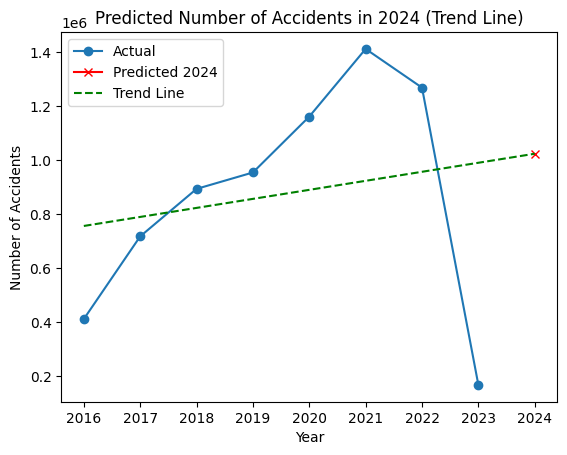

Predicted number of accidents in 2024: 1023797


In [48]:

df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["Start_Year"] = df["Start_Time"].dt.year

yearly_counts = df.groupby("Start_Year").size().reset_index(name="Count")

years = yearly_counts["Start_Year"].values
counts = yearly_counts["Count"].values

m, b = np.polyfit(years, counts, 1)

pred_2024 = int(m * 2024 + b)

plt.plot(years, counts, marker="o", label="Actual")

plt.plot(2024, pred_2024, marker="x", color="red", label="Predicted 2024")

x_vals = np.arange(min(years), 2025)
plt.plot(x_vals, m * x_vals + b, color="green", linestyle="--", label="Trend Line")

plt.title("Predicted Number of Accidents in 2024 (Trend Line)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.show()

print("Predicted number of accidents in 2024:", pred_2024)

In [49]:
pred_2024

1023797

In [50]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np


bool_cols = df_slice.select_dtypes(include=bool)
val_counts = bool_cols.apply(lambda x: x.value_counts())

fig_scatter = px.scatter(
    df_slice,
    x="Start_Lat",
    y="Start_Lng",
    labels={"Start_Lat": "Start Latitude", "Start_Lng": "Start Longitude"},
    height=800,
    title="Accident Locations Scatter Plot"
)
fig_scatter.update_traces(marker=dict(size=4, opacity=0.6))

fig_map = px.scatter_mapbox(
    df_slice.sample(10000), 
    lat="Start_Lat", lon="Start_Lng",
    hover_name="City",
    hover_data=["State", "Weather_Condition"],
    color_discrete_sequence=["red"], zoom=3, height=500
)
fig_map.update_layout(mapbox_style="open-street-map")
fig_map.update_layout(title="Map of Accident Locations (Sample of 10000)")

count_by_state = df_slice.groupby("State").size().reset_index(name='Count').sort_values(by='Count')
count_by_state.columns = ["State", "Count"]

fig_states = px.bar(
    count_by_state,
    x="State",
    y="Count",
    title="Count by State",
    labels={"Count": "Number of Records"},
    height=600,
    width=1000
)
fig_states.update_layout(xaxis=dict(tickangle=45), bargap=0.2)

fig_daynight = px.histogram(
    df_slice,
    x='twilight_conclusion',
    color=df_slice['twilight_conclusion'].map({0:'Night',1:'Day'}),
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig_daynight.update_layout(
    title='Day vs Night Accidents',
    xaxis_title='Time of Day',
    yaxis_title='Number of Accidents',
    bargap=0.2
)

count_by_state_month = (
    df_slice
    .groupby(["State", "Start_Month"])
    .size()
    .reset_index(name="Count")
)

max_month_per_state = (
    count_by_state_month
    .loc[count_by_state_month.groupby("State")["Count"].idxmax()]
    .sort_values("Count", ascending=False)
)

fig_monthly = px.bar(
    max_month_per_state,
    x="State",
    y="Count",
    color="Start_Month",
    title="Month with Most Accidents in Each State",
    text="Start_Month",
    height=600,
    width=1000,
    color_continuous_scale='jet'
)

count_by_year = df.groupby("Start_Year").size().reset_index(name='Count').sort_values(by='Count')
fig_yearly = px.bar(
    count_by_year,
    x="Start_Year",
    y="Count",
    title="Accidents by Year",
    height=600,
    width=1000
)

daily_counts = df_slice.groupby(df_slice["Start_Day"]).size().reset_index(name="Count")
fig_daily = px.line(
    daily_counts,
    x="Start_Day",
    y="Count",
    title="Daily Accident Counts",
    labels={"Start_Day": "Day", "Count": "Number of Accidents"},
)

week_order = [
    "Friday",
    "Saturday",
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
]

weekday_counts = (
    df_slice["Start_DayofWeek"].value_counts().reindex(week_order).reset_index()
)
weekday_counts.columns = ["Day", "Count"]

fig_weekday = px.line(
    weekday_counts,
    x="Day",
    y="Count",
    title="Accidents by Weekday",
    labels={"Day": "Day of Week", "Count": "Number of Accidents"},
)

heat_data = (
    df_slice.groupby(["Start_DayofWeek", "Start_Hour"]).size().reset_index(name="Count")
)

fig_heatmap = px.density_heatmap(
    heat_data,
    x="Start_Hour",
    y="Start_DayofWeek",
    z="Count",
    category_orders={"Day_of_Week": week_order},
    title="Accidents Heatmap by Day and Hour",
    color_continuous_scale="Reds",
)

weather_counts = df_slice["Weather_Condition"].value_counts().head(10).reset_index()
weather_counts.columns = ["Weather_Condition", "Count"]

fig_weather = px.bar(
    weather_counts,
    x="Weather_Condition",
    y="Count",
    title="Top 10 Weather Conditions - Accident Counts",
    labels={"Weather_Condition": "Weather Condition", "Count": "Number of Accidents"},
    text="Count",
)
fig_weather.update_traces(textposition="outside")

severity_counts = df_slice["Severity"].value_counts().reset_index()
severity_counts.columns = ["Severity", "Count"]
fig_severity = px.pie(
    severity_counts,
    names="Severity",
    values="Count",
    title="Severity Distribution",
)

hour_counts = df_slice.groupby("Start_Hour").size().reset_index(name="Count")
fig_hourly = px.bar(
    hour_counts,
    x="Start_Hour",
    y="Count",
    title="Accident Counts by Hour of Day",
    labels={"Hour": "Hour of Day", "Count": "Number of Accidents"},
)

city_counts = (
    df_slice.groupby(["City", "Start_Lat", "Start_Lng"]).size().reset_index(name="Count")
)
city_counts = city_counts.sort_values(by="Count", ascending=False).head(500)  

fig12 = px.scatter_mapbox(
    city_counts,
    lat="Start_Lat",
    lon="Start_Lng",
    size="Count",
    color="Count",
    hover_name="City",
    title="Top 500 Accident Hotspots in 2024",
    color_continuous_scale="Reds",
    zoom=3,
    height=700,
)
fig12.update_layout(mapbox_style="open-street-map")

state_counts = df_slice.groupby("State").size().reset_index(name="Count")
fig13 = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="State-Level Accident Density (2024)",
    color_continuous_scale="Reds",
)

yearly_counts = df_slice.groupby("Start_Year").size().reset_index(name="Count")
years = yearly_counts["Start_Year"].values
counts = yearly_counts["Count"].values
m, b = np.polyfit(years, counts, 1)
pred_2024 = int(m * 2024 + b)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.Div([
        html.H1("US Traffic Accidents Analytics Dashboard", 
                style={
                    'textAlign': 'center',
                    'color': '#2c3e50',
                    'fontFamily': 'Arial, sans-serif',
                    'marginBottom': '10px',
                    'fontWeight': 'bold'
                }),
        html.H3(f"Predicted Accidents in 2024: {pred_2024:,}", 
                style={
                    'textAlign': 'center', 
                    'color': '#e74c3c',
                    'fontFamily': 'Arial, sans-serif',
                    'backgroundColor': '#f8f9fa',
                    'padding': '15px',
                    'borderRadius': '10px',
                    'margin': '20px auto',
                    'maxWidth': '600px',
                    'border': '2px solid #e74c3c'
                }),
        
        html.Div([
            html.Div([
                html.H4("Total Records", style={'color': '#3498db', 'marginBottom': '5px'}),
                html.H2(f"{len(df_slice):,}", style={'color': '#2c3e50', 'margin': '0'})
            ], style={
                'backgroundColor': '#ecf0f1', 'padding': '20px', 'borderRadius': '10px',
                'textAlign': 'center', 'margin': '10px', 'flex': '1', 'minWidth': '200px'
            }),
            html.Div([
                html.H4("States Covered", style={'color': '#2ecc71', 'marginBottom': '5px'}),
                html.H2(f"{df_slice['State'].nunique()}", style={'color': '#2c3e50', 'margin': '0'})
            ], style={
                'backgroundColor': '#ecf0f1', 'padding': '20px', 'borderRadius': '10px',
                'textAlign': 'center', 'margin': '10px', 'flex': '1', 'minWidth': '200px'
            }),
            html.Div([
                html.H4("Cities", style={'color': '#f39c12', 'marginBottom': '5px'}),
                html.H2(f"{df_slice['City'].nunique():,}", style={'color': '#2c3e50', 'margin': '0'})
            ], style={
                'backgroundColor': '#ecf0f1', 'padding': '20px', 'borderRadius': '10px',
                'textAlign': 'center', 'margin': '10px', 'flex': '1', 'minWidth': '200px'
            }),
        ], style={'display': 'flex', 'flexWrap': 'wrap', 'justifyContent': 'space-around', 'margin': '20px 0'}),
        
        html.Hr(style={'margin': '30px 0'})
    ]),
    
    dcc.Tabs(id="main-tabs", value='overview-tab', children=[
        
        dcc.Tab(label='Overview & Summary', value='overview-tab', children=[
            html.Div([
                html.H2("Key Insights", style={'color': '#2c3e50', 'marginTop': '30px'}),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig_yearly)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                    html.Div([
                        dcc.Graph(figure=fig_daynight)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                ]),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig_severity)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                    html.Div([
                        dcc.Graph(figure=fig_states)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                ]),
            ])
        ]),
        
        dcc.Tab(label='Temporal Analysis', value='temporal-tab', children=[
            html.Div([
                html.H2("Time-Based Patterns", style={'color': '#2c3e50', 'marginTop': '30px'}),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig_yearly)
                    ], style={'width': '60%', 'display': 'inline-block', 'padding': '10px'}),
                    html.Div([
                        dcc.Graph(figure=fig_daynight)
                    ], style={'width': '40%', 'display': 'inline-block', 'padding': '10px'}),
                ]),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig_monthly)
                    ], style={'width': '100%', 'padding': '10px'}),
                ]),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig_weekday)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                    html.Div([
                        dcc.Graph(figure=fig_hourly)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                ]),
                
                html.Div([
                    dcc.Graph(figure=fig_heatmap)
                ], style={'padding': '10px'}),
                
                html.Div([
                    dcc.Graph(figure=fig_daily)
                ], style={'padding': '10px'}),
            ])
        ]),
        
        dcc.Tab(label='Geographic Analysis', value='geographic-tab', children=[
            html.Div([
                html.H2("Geographic Distribution", style={'color': '#2c3e50', 'marginTop': '30px'}),
                
                html.Div([
                    dcc.Graph(figure=fig_map)
                ], style={'padding': '10px'}),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig13)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                    html.Div([
                        dcc.Graph(figure=fig12)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                ]),
                
                html.Div([
                    dcc.Graph(figure=fig_states)
                ], style={'padding': '10px'}),
                
                html.Div([
                    dcc.Graph(figure=fig_scatter)
                ], style={'padding': '10px'}),
            ])
        ]),
        
        dcc.Tab(label='Environmental Factors', value='environmental-tab', children=[
            html.Div([
                html.H2("Weather & Environmental Conditions", style={'color': '#2c3e50', 'marginTop': '30px'}),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig_weather)
                    ], style={'width': '70%', 'display': 'inline-block', 'padding': '10px'}),
                    html.Div([
                        dcc.Graph(figure=fig_severity)
                    ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
                ]),
                
                html.Div([
                    html.H3("Analysis Summary", style={'color': '#2c3e50', 'margin': '30px 0 20px 0'}),
                    html.P("This section analyzes the relationship between environmental conditions and accident occurrence. "
                           "Weather conditions play a significant role in traffic safety, with certain conditions leading to "
                           "higher accident rates.", 
                           style={'fontSize': '16px', 'lineHeight': '1.6', 'color': '#555', 'margin': '0 20px'}),
                ])
            ])
        ]),
        
        dcc.Tab(label='Detailed Analytics', value='detailed-tab', children=[
            html.Div([
                html.H2("Advanced Analytics", style={'color': '#2c3e50', 'marginTop': '30px'}),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig_heatmap)
                    ], style={'width': '60%', 'display': 'inline-block', 'padding': '10px'}),
                    html.Div([
                        dcc.Graph(figure=fig_hourly)
                    ], style={'width': '40%', 'display': 'inline-block', 'padding': '10px'}),
                ]),
                
                html.Div([
                    html.Div([
                        dcc.Graph(figure=fig_daily)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                    html.Div([
                        dcc.Graph(figure=fig_weekday)
                    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
                ]),
                
                html.Div([
                    html.H3("Key Findings", style={'color': '#2c3e50', 'margin': '30px 0 20px 0'}),
                    html.Ul([
                        html.Li(f"Total accidents analyzed: {len(df_slice):,}", style={'margin': '10px 0'}),
                        html.Li(f"Coverage: {df_slice['State'].nunique()} states and {df_slice['City'].nunique():,} cities", style={'margin': '10px 0'}),
                        html.Li(f"Predicted accidents for 2024: {pred_2024:,}", style={'margin': '10px 0'}),
                        html.Li("Peak accident times and seasonal patterns identified", style={'margin': '10px 0'}),
                    ], style={'fontSize': '16px', 'lineHeight': '1.6', 'color': '#555', 'margin': '0 20px'})
                ])
            ])
        ])
        
    ], style={
        'fontFamily': 'Arial, sans-serif',
        'fontSize': '16px'
    }),
    
    html.Div([
        html.Hr(style={'margin': '40px 0'}),
        html.P("Dashboard created with Plotly Dash | Data represents traffic accident patterns across the United States", 
               style={
                   'textAlign': 'center', 
                   'color': '#7f8c8d', 
                   'fontStyle': 'italic',
                   'margin': '20px 0'
               })
    ])
    
], style={
    'fontFamily': 'Arial, sans-serif',
    'margin': '0 auto',
    'maxWidth': '1400px',
    'padding': '20px',
    'backgroundColor': '#ffffff'
})

if __name__ == "__main__":
    app.run(debug=True, port=8050)

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\1649353778.py:22: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

C:\Users\amrta\AppData\Local\Temp\ipykernel_25972\1649353778.py:176: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

